DTSC 680 Final Project

Name: Tyler Stark

Semester: Fall 2, 2024

In the following assignment, I have created and trained two models to help identify whether a mushroom is poisonous or edible, based off provided features in the dataset.

I began by loading the dataset and encoding it to 'utf-8'. From here, I deviated from the outline immediately and decided to split the data into a 'features' (x) and 'target' (y) group. I then One-Hot Encoded the features data, and Label Encoded the target data.

I then created the first model - neural network - with one input and one output layer. I used relu activation in the input layer, with 117 input dimensions due to the amount of features in the One-Hot encoded data. I used sigmoid activation and 1 output in the output layer due to binary classifcation. I used the adam optimizer, along with binary_crossentropy and accuracy because of the binary classifcation of the model.

The next step was to train the model with an 80 Train / 20 Test split. I chose a smaller amount of epochs to keep the training quick, and I found the validation accuracy to be sufficient. I timed the training, which can be seen below.

I plotted the training and validation accuracy of the model against one another. They began to converge towards the end of training. I followed this plot with a Confusion Matrix Display, noticing that there were very few false positives/negatives. However, with something as serious as eating a poisonous mushroom, there should be very little room for error.

I moved onto the 2nd model by import Principal Component Analysis (PCA), and reducing the features data to just 95% of its variance. This reduced the amount of features from 117 to 40 - a considerable drop for just a 5% drop. I followed the exact steps as above, but changed the input layer to 40 to account for the drop in features.

I found the second model to be lacking, by comparison. There were more false positives and negatives when ran for the same epoch, batch size and neuron size. The running time was slightly quicker, but that seems inconsequential due to the nature of the topic (slower and more accurate would probably be better in this case).

I then answered my Concept Questions (see below), and dumped my PCA model into a Pickle File.

In [1]:
import numpy as np
import pandas as pd

#loading the dataset
df = pd.read_csv('Data/agaricus-lepiota.csv', encoding='utf-8')

In [2]:
#splitting the data set into features and targets
#I am waiting to do an 80 Train/20 Test split until the actual training of the model
target = df['p']
features = df.drop('p', axis=1)

In [3]:
#onehotencoding the features of the dataset
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
features = ohe.fit_transform(features)
features = features.toarray()

#labelEncoding the targets of the dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)

In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# instantiate an object of the Sequential class
model = Sequential()

# add input, 128 neurons and input dimension of 117
model.add(Dense(128, activation='relu', input_dim=117))

# add output layer with sigmoid activation function, 1 for classification
model.add(Dense(1, activation='sigmoid'))

# use binary_crossentropy loss and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               15104     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15,233
Trainable params: 15,233
Non-trainable params: 0
_________________________________________________________________


In [5]:
#training a model with a 80/20 split, 10 epochs and 100 batch size, using the %time function
%time hist = model.fit(features, target, validation_split=0.2, epochs=10, batch_size=100)

Epoch 1/10
65/65 [==============================] - 1s 5ms/step - loss: 0.2467 - accuracy: 0.9249 - val_loss: 0.2286 - val_accuracy: 0.8892
Epoch 2/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9951 - val_loss: 0.1355 - val_accuracy: 0.9311
Epoch 3/10
65/65 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9986 - val_loss: 0.1004 - val_accuracy: 0.9545
Epoch 4/10
65/65 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9995 - val_loss: 0.0688 - val_accuracy: 0.9705
Epoch 5/10
65/65 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9998 - val_loss: 0.0528 - val_accuracy: 0.9785
Epoch 6/10
65/65 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.0426 - val_accuracy: 0.9846
Epoch 7/10
65/65 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0381 - val_accuracy: 0.9852
Epoch 8/10
65/65 [==

[]

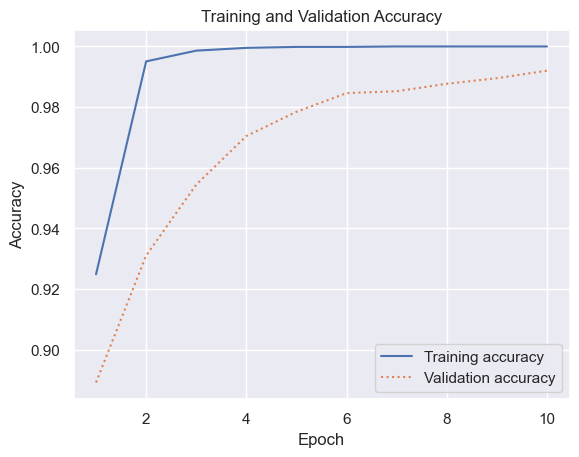

In [6]:
#checking model validation accurary
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

254/254 [==============================] - 0s 1ms/step


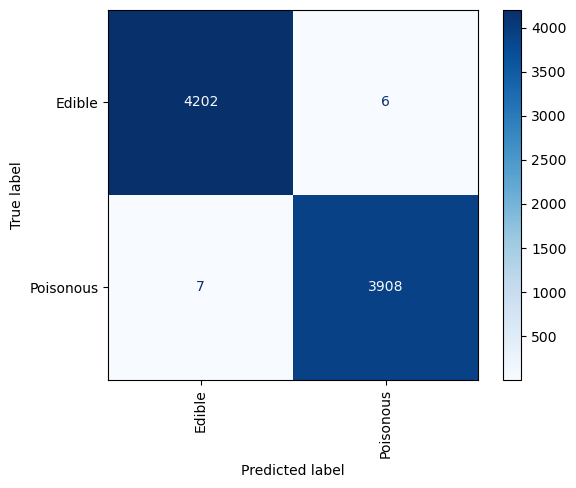

In [7]:
#confusion matrix display (more edibles listed as poisonous rather than vice versa)
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
target_predicted = model.predict(features) > 0.5
labels = ['Edible', 'Poisonous']
cmd.from_predictions(target, target_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

In [8]:
# import PCA from sklearn
from sklearn.decomposition import PCA

#creating PCA to keep 95% of variance in the features
pca = PCA(n_components=0.95, random_state=0)
pca_features = pca.fit_transform(features)

In [9]:
# instantiate an object of the Sequential class
pca_model = Sequential()

# add input, 128 nearons and input dimension of 40
pca_model.add(Dense(128, activation='relu', input_dim=40))

# add output layer with sigmoid activation function, 1 for classification
pca_model.add(Dense(1, activation='sigmoid'))

# use binary_crossentropy loss and accuracy metric
pca_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
pca_model.summary()

#training a model with a 80/20 split, 10 epochs and 100 batch size, using the %time function
%time pca_hist = pca_model.fit(pca_features, target, validation_split=0.2, epochs=10, batch_size=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               5248      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
65/65 [==============================] - 1s 5ms/step - loss: 0.4018 - accuracy: 0.9161 - val_loss: 0.3729 - val_accuracy: 0.9391
Epoch 2/10
65/65 [==============================] - 0s 3ms/step - loss: 0.1197 - accuracy: 0.9877 - val_loss: 0.2415 - val_accuracy: 0.9311
Epoch 3/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9963 - val_loss: 0.1933 - val_accuracy: 0.9372
Epoch 4/10
65/65 [==========

[]

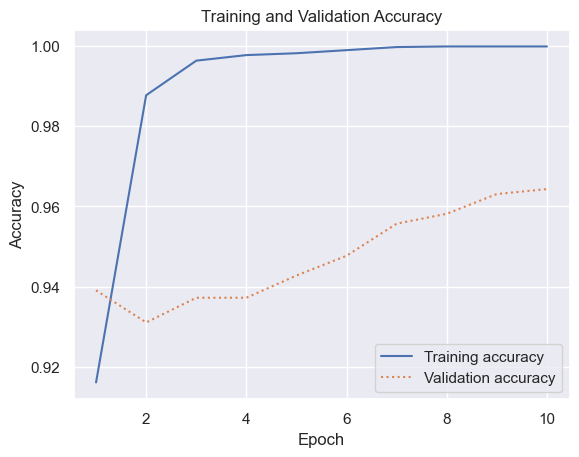

In [10]:
#checking the training and validation accuracy
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = pca_hist.history['accuracy']
val = pca_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

254/254 [==============================] - 0s 1ms/step


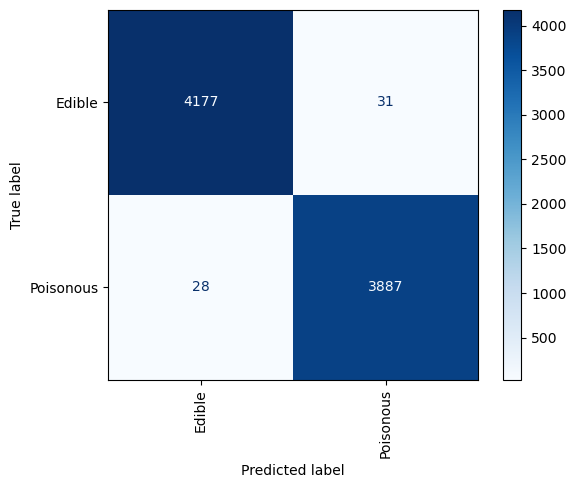

In [11]:
#analyzing the confusion matrix
sns.reset_orig()
pca_target_predicted = pca_model.predict(pca_features) > 0.5
labels = ['Edible', 'Poisonous']
cmd.from_predictions(target, pca_target_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

CONCEPT QUESTIONS

(1) How many features does the data have after the One-Hot Encoding? How does 
this compare to the number of features that the data had before the encoding

There are 117 features in the dataset after One-Hot-Encoding. Previously, there were only 22. This is because a column is added for each possible variable in each feature during One-Hot Encoding.

(2) . What should the units parameter of the second layer in the network be and wh

If this question is pertaining to the parameters of the Output layer, then the units should be the number of neurons, plus 1 classification output. In my case, it is 128 + 1 because I chose 128 neurons for my models. This means there are 129 total connections in the layer.

(3) c. How many connections does your neural network conta

15,233 in total. The Input layer is because I have trained with 128 neurons, with 117 input dimensions (128x118 = 15104). The Output layer is 129 because of 128 neurons with 1 classification output. 15104 + 129 = 15233.

(4)  d. How many features does the training data contain after dimensionality reduct n?
 How does this compare with the encoded 

There are only 40 features after dimensionality reduction, far fewer than the original encoded data (117).

(5) 
 e. Why does the input_dim parameter of the first layer need to change fro the 
previous neural n

The input dimensions must change to 40 because the amount of features has been reduced by 95% through PCA, dropping down from 117.

(6) k?
 f. Compare the training time of the original neural network with the training ime of 
the PCA neural network. Are the results what you 

The PCA model training time is only slightly faster than the original neural network. This surprises me, because the features of the dataset have been reduced tremendously. Therefore, I would have assumed a much quicker time. However, I trained with a small amount of (epochs) and found the validation accuracy to be sufficient. If I increased the amount of epochs, I am sure I would see a larger difference between the two times.expected?

In [12]:
# saving my PCA model as a pickle file
import pickle

#Save dataset to file
with open('model.pkl', 'wb') as file:
    pickle.dump(pca_model , file)

INFO:tensorflow:Assets written to: ram://ce24976d-53d2-4af7-bf7e-20acc9305dab/assets
